In [84]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


df = pd.read_excel("selected_capture_inputs.xlsx")

print("Dataset Loaded Successfully")
df.head()


Dataset Loaded Successfully


,flue_co2_frac,flue_gas_temp,gas_flow,gas_pressure_bar,MEA_wt_frac,solvent_flow,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,0.08618,847.907,69.89,1.750,0.419,183.938,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.17261,999.528,66.63,2.120,0.255,138.093,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.13980,1723.640,54.09,1.844,0.304,926.078,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.11980,746.008,88.58,1.125,0.399,1450.869,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.05340,1752.334,78.13,1.278,0.345,778.946,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
import pandas as pd

# Load only needed columns (automatic cleanup)
df = pd.read_excel("selected_capture_inputs.xlsx")

# Remove empty NaN columns
df = df.dropna(axis=1, how="all")

# Remove columns named "Unnamed"
df = df.loc[:, ~df.columns.str.contains("Unnamed")]

df.tail()


,flue_co2_frac,flue_gas_temp,gas_flow,gas_pressure_bar,MEA_wt_frac,solvent_flow
4995,0.16461,1729.546,92.07,2.316,0.298,1430.799
4996,0.04791,1805.267,54.22,1.070,0.418,1134.345
4997,0.07918,1898.745,44.10,1.456,0.477,78.211
4998,0.15236,855.227,94.64,1.665,0.391,631.457
4999,0.11960,512.567,60.09,1.258,0.486,423.227


In [86]:
# ---------------------------------------------------
# 3. CHECK DATA
# ---------------------------------------------------
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   flue_co2_frac     5000 non-null   float64
 1   flue_gas_temp     5000 non-null   float64
 2   gas_flow          5000 non-null   float64
 3   gas_pressure_bar  5000 non-null   float64
 4   MEA_wt_frac       5000 non-null   float64
 5   solvent_flow      5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


flue_co2_frac       0
flue_gas_temp       0
gas_flow            0
gas_pressure_bar    0
MEA_wt_frac         0
solvent_flow        0
dtype: int64

In [87]:
df["co2_capture_efficiency"] = (
      20*df["MEA_wt_frac"]
    + 0.03*df["solvent_flow"]
    + 1.8*df["flue_co2_frac"]
    - 0.02*df["flue_gas_temp"]
    + 58
    + np.random.normal(0, 2, len(df))
)



In [88]:
# ---------------------------------------------------
# 5. DEFINE INPUT FEATURES (ONLY FIRST 6 COLUMNS)
# ---------------------------------------------------
X = df[[
    "flue_co2_frac",
    "flue_gas_temp",
    "gas_flow",
    "gas_pressure_bar",
    "MEA_wt_frac",
    "solvent_flow"
]]

y = df["co2_capture_efficiency"]



In [89]:
X = df.drop("co2_capture_efficiency", axis=1)
y = df["co2_capture_efficiency"]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [90]:
# -----------------------------------------------
# 7. FEATURE SCALING (Optional for tree models)
# -----------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [91]:
# -----------------------------------------------
# 8. MODEL TRAINING (Random Forest)
# -----------------------------------------------
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    random_state=42
)

model.fit(X_train_scaled, y_train)

print("Model Training Completed")


Model Training Completed


In [92]:
# -----------------------------------------------
# 9. MODEL EVALUATION
# -----------------------------------------------
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 2.3456796501913284
R² Score: 0.9800012093840468


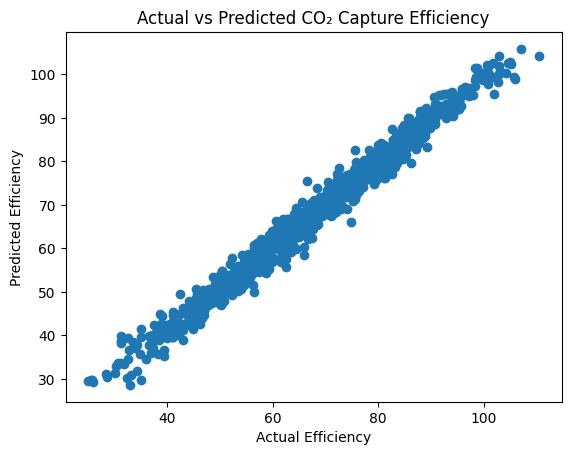

In [93]:
# -----------------------------------------------
# 10. VISUALIZATION OF PREDICTION ACCURACY
# -----------------------------------------------
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Efficiency")
plt.ylabel("Predicted Efficiency")
plt.title("Actual vs Predicted CO₂ Capture Efficiency")
plt.show()


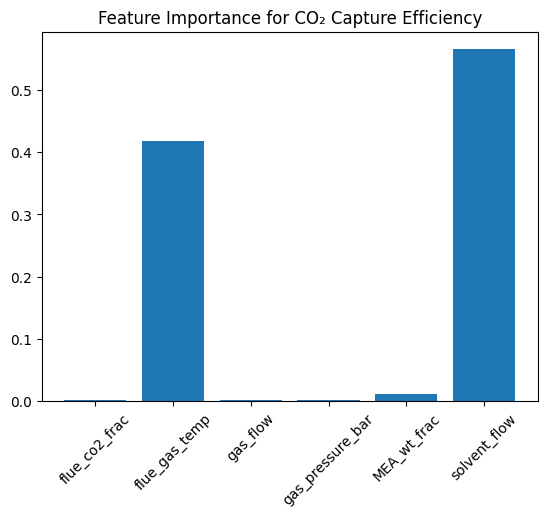

In [94]:
# -----------------------------------------------
# 11. FEATURE IMPORTANCE
# -----------------------------------------------
importances = model.feature_importances_
plt.bar(X.columns, importances)
plt.xticks(rotation=45)
plt.title("Feature Importance for CO₂ Capture Efficiency")
plt.show()


In [95]:
# -----------------------------------------------
# 12. PREDICT FOR A NEW PROCESS CONDITION
# -----------------------------------------------
new_data = pd.DataFrame({
    "flue_co2_frac": [12],
    "flue_gas_temp": [450],
    "gas_flow": [55],
    "gas_pressure_bar": [1.2],
    "MEA_wt_frac": [0.35],
    "solvent_flow": [1200]
})

new_data_scaled = scaler.transform(new_data)

prediction = model.predict(new_data_scaled)
print("Predicted Capture Efficiency:", prediction[0])


Predicted Capture Efficiency: 91.31726212100624
